# Библиотеки

In [1]:
import pandas as pd

In [2]:
import math
from scipy import stats  

#  Введение

**Основные понятия** 
- **Генеральная совокупность** – множество всех объектов, относительно которых делаются выводы в рамках исследования.
- **Выборка** – часть генеральной совокупности элементов, модель генеральной совокупности, которая охватывается экспериментом (наблюдением, опросом).
- **Репрезентативная выборка** – это такая выборка, в которой все основные признаки генеральной
совокупности, из которой извлечена данная выборка, представлены приблизительно в той же пропорции
или с той же частотой, с которой данный признак выступает в этой генеральной совокупности.

**Способы репрезентативной выборки:**
- Простая случайная выборка (simple random sample)
- Стратифицированная выборка (stratified sample) – разделение генеральной совокупности на различные по своей природе страты (группы), а затем случайный отбор из каждой страты.
- Групповая выборка (cluster sample) – генералная совокупность состит из похожих групр.при формирирвоании выборки выбирают любую (любые) группы, а затем из них делается случайная выборка (например, районы одного города)

**Примеры**

*simple random sample*. Для того чтобы протестировать курс по введению в статистику и выяснить, насколько хорошо с ним справятся студенты Института биоинформатики, случайным образом было выбрано 50 студентов института.

*stratified sample*. Для исследования взаимосвязи риска развития заболевания и группы крови человека потенциальных участников исследования разделили на четыре группы (в соответствии с группой крови). Затем из каждой группы случайным образом извлекли по 50 человек.

*cluster sample*. Чтобы проверить знания школьников Санкт-Петерубрга по математике, было организовано исследование. Случайным образом было выбрано 10 школ, затем из каждой школы случайным образом было отобрано по 50 учащихся разных классов.

<div class="alert alert-warning">
<h2> Типы переменных. Количественные и номинативные переменные </h2>

</div>

**Типы переменных:**
- Количественные – измеряемое (например, рост):
    - Непрерывные – переменная принимает любое значение на опр. промежутке [4, 50]; Цифры имеют матемический смысл. 
    - Дискретные – только определенные значения (1,2,34 ). Цифры имеют матемический смысла. 
- Номинативные (= качественные) – разделение испытуемых на группы, цифры как маркеры (например: 1 -женщины, 2 – мужчины). Цифры не имеют матемического смысла. 
- Ранговые – похоже на номинативные, только возможны сравнения (быстрее/медленнее и т.п.)


<div class="alert alert-warning">
<h2> Меры центральной тенденции </h2> 
</div>

Мера центральной тенденции — число, служащее для описания множества значений одним-единственным числом (для краткости).

### Мода (mode)

**Мода (mode)** – значение измеряемого признака, которое встречается максимально часто. График Dot Plot (точечный график) поможет найти моду

In [3]:
# Вариант 1

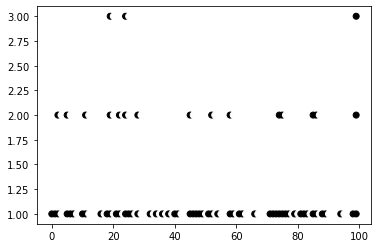

In [4]:
import numpy as np; np.random.seed(13)
import matplotlib.pyplot as plt

n = 100

data = np.random.randint(0, n, size=72)
bins = np.arange(n+1)-0.5

hist, edges = np.histogram(data, bins=bins)

y = np.arange(1,hist.max()+1)
x = np.arange(n)
X,Y = np.meshgrid(x,y)

plt.scatter(X,Y, c=Y<=hist, cmap="Greys")

plt.show()

In [5]:
# Вариант 2

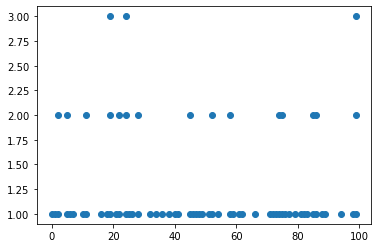

In [6]:
# функция, котоая строит график и выводит моду
pos = [] 
keys = {} # this dict will help to keep track ...

# this loop will give us a list of frequencies to each number
for num in data: 
    if num not in keys:
        keys[num] = 1
        pos.append(1)
    else:
        keys[num] += 1
        pos.append(keys[num])

plt.scatter(data, pos)
plt.show()

In [7]:
#функция которая счиатет кол-во вхождений в словарь

# fucntion which get all key with  certain value
def get_key(d, value):
    box_of_keys = []
    for k, v in d.items():
        if v == value:
            box_of_keys.append(k)
    box_of_keys.sort()
    return box_of_keys

In [8]:
# итоговые моды
get_key(keys,
         max(keys.values()))

[19, 24, 99]

In [9]:
### реализация через scipy
# If there is more than one such value, only the smallest is returned.
print(stats.mode(data)[0][0])


19


###  Медиана (median)

**Медиана (median)** – значение признака, которое делит упорядоченное множество данных пополам. Если в середине 2 значения оказываются в случае с как с четными числами, то находится среднее значение этих двух цифр (суммируются цифры и делятся на 2);

In [12]:
# функция, которая возврашает медиану 
def calculate_median(array):
    array = sorted(array)
    average_of_array = len(array)//2
    if len(array)%2 == 0:
        median = (array[average_of_array-1]+array[average_of_array])/2
    else:
        median = array[average_of_array]
    return median

calculate_median(data)

47.5

In [11]:
# The numpy median function helps in finding the middle value of a sorted array.
np.median(data)

47.5

### Среднее значение (mean) 

**Среднее значение (mean)** – сумма всех значений измеренного признака делится на количество измеренных значений. (переменная = «Х» с черточкой «-» вверху используется для среднего значения из выборки, а для генеральной совокупности латинская буква М).
- Мера вариативности - то как признак меняется относительно центральной тендеции

In [13]:
#python:
def mean_(y):
    return sum(y)/len(y)

mean_(data)

48.18055555555556

In [14]:
#Arithmetic mean is the sum of the elements along the axis divided by the number of elements.
np.mean(data)
np.average(data)

48.18055555555556

**Средневвешенное** -  математическое понятие, обобщающее среднее арифметическое. Среднее арифметическое взвешенное набора чисел ${\displaystyle x_{1},\ldots ,x_{n}}x_{1},\ldots ,x_{n}$ с весами ${\displaystyle w_{1},\ldots ,w_{n}}w_{1},\ldots ,w_{n} $

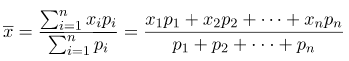

In [1]:
# Подход 1
from IPython.display import Image
Image(filename='фото//output1.png')

$\mu$ - обознаечени среднего в генеральной совокупности

In [15]:
# средневвешенное  нужно передать веса (в данном пример)
np.average(data,
           weights=data[::-1]*10)

49.37618910348804

**Примеры использования**

- Если распределение симметрично, унимодально и не имеет заметных выбросов: можно использовать любую из мер центральной тенденции и среднее, и мода, и медиана дадут примерно одинаковое значение.
- Если распределение с явно выраженной асимметрией (скошено либо влево/вправо), заметные выбросы или несколько мод: использование среднего нерелевантно, лучше или моду или медиану, чтобы охарактеризовать наши данные с точки зрения выраженности некоторого количественного признака.

### Свойства среднего

$ М_{x+c} = М_x + с$ (если к каждому значению некоторого распредления прибавить константу, то и среднее сдвинется на эту константу)

$ М_{x*c} = М_x*c $ (если каждое значению некоторого распредления умножим на константу, то и среднее увеличиться в эту константу)

$\sum\limits_{i=1}^n (x_{i} - \mu)^2  = 0 $  (половина значений имеет положительное отклонение нивилируется другой половиной, которая меньше 0)

<div class="alert alert-warning">
<h2> Меры изменчивости </h2>
</div>

### Размах

**Размах** - расстояние, в пределах которого изменяются оценки, и обозначается буквой $R = X_{(n)} - X_{(1)}$, разность между максимальным и минимальным значениями ряда.  

### Дисперсия 

**Дисперсия** - средний квадрат отклонений индивидуальных значений признака от их средней величины.

- **Дисперсия генеральной совокупности**: 
$$D = \frac{\sum_{i=1}^{n} (x_{i} - M_{x})^2}{n}$$
- **Дисперсия выборки**:
$$D = \frac{\sum_{i=1}^{n} (x_{i} - M_{x})^2}{n-1}$$

In [16]:
# дисперсия выборки
def sd(list_):
    deviation_sum_of_data = 0
    mean_ = np.mean(list_)
    for x_i in list_:
        deviation_sum_of_data += (x_i - mean_)**2
    return deviation_sum_of_data  / (len(list_) - 1)


sd(data)

901.1077856025036

In [17]:
# готовая формула
import statistics
statistics.variance(data)

901

### Среднеквадратическое отклонение

**Среднеквадратическое отклонение** - наиболее распространённый показатель рассеивания значений случайной величины относительно её математического ожидания (средней величины).

$\sigma = \sqrt{D}$ D  из генеральной совокупности

$sd = \sqrt{D}$ Тут D из выборки.

In [18]:
# usual realisation
sd(data)**.5

30.018457415438647

In [29]:
# built in function
statistics.stdev(data)

30.01666203960727

### Свойства дисперсии и стандартного отклонения

$ D_{x+c} = D_x $ (если прибавляется произвольное число, то среднее меняется, но сама форма распределения осталась прежней

$ sd_{x+c} = sd_{x} $

$ D_{x*c} = D_x*c^2 $ (если каждое значение признака умножается на констату, то новое распределение становится более широким/ узким, а занчит стандартное отклонение увеличится в эту константу, а дисперсия  - это квадрат от стандартного отклонения, поэтому получится квадрат)

$ sd_{x*c} = sd_{x}*C $

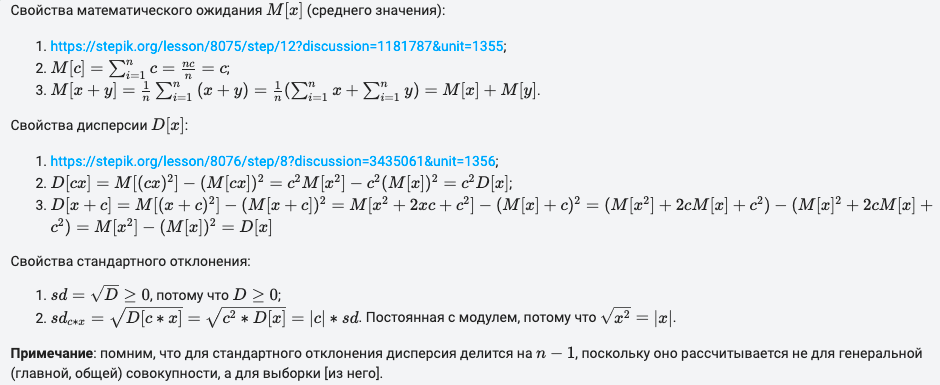

In [3]:
Image(filename='фото//output3.png')

<div class="alert alert-warning">
<h2> Квартили распределения и график box-plot </h2>
</div>

**Квантиль** – значение, которое заданная случайная величина не превышает с фиксированной вероятностью: P(X ≤ xα) ≥ α

**Квартили** – три значения признака, которые делят упорядоченное множество данных на четыре равные части.

Box plot (ящик с усамми) - вид диаграммы, в удобной форме показывает:
- медиану $M_{e}=Q2$;
- нижний ($Q1$) и верхний ($Q3$) квартили;
- межквартильный размах $IQR = Q_{3} - Q_{1}$;
- минимальное и максимальное значение выборки;
- выбросы: всё, что ниже $Q1 - 1,5*IQR$ и выше $Q3 + 1,5*IQR$ (о выбросах стоит говорить именно в терминах $IQR$).

<div class="alert alert-warning">
<h2> Нормальное распределение </h2>
</div>

Нормальное распределение -  распределение вероятностей, которое в одномерном случае задаётся функцией плотности вероятности, совпадающей с функцией Гаусса:
$$f(x) = \frac{1} {\sigma\sqrt{2 \pi}} exp{( -\frac{(x- \mu )^2} {2 \sigma ^2} )},$$ 
где $\mu$ - математическое ожидание (среднее значение), медиана и мода распределения, а $\sigma$ - среднеквадратическое отклонение ($\sigma^{2}$ — дисперсия) распределения.

- Унимодальное распределение - распределение, имеющее только одну моду (т.е. один "пик").
- Симметрично.
- Отклонения наблюдений от среднего подчиняются определенному вероятностному закону.

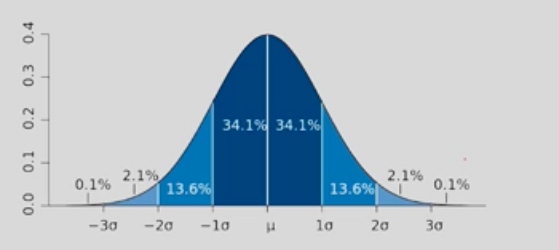

In [10]:
Image(filename='фото//output4.png')

**Как любые данные преобразовать к виду когда среднее значение =0, дисперсия = 1?**

z-стандартизация (или *z - оценка*) - процедура по превращению нормального распределения $X \backsim N(\mu , \sigma)$ в стандартное $Z \backsim N(0 , 1)$ с Z-шкалой (*Z-scores*).

$$ Z_{i}=\frac{x_{i} - \bar{X}}{sd} $$


Это преобразование включает центрирование случайной величины (разность ${ {(x-\mu )}} $ между данной случайной величиной x и ее математическим ожиданием $ \mu $ и нормирование (отношение $x \over \sigma $ данной случайной величины x к ее стандартному отклонению $\sigma $.

Почему среднее превращется в ноль, а дисперсия в единицу? Так как 
 - числитель: среднее - среднее = 0, а занчит деление на любое число не повлияет на среднее]
 - знаменатель: так как каждое значение умножается на  $1  \over \sigma $ то дисперсию нужно ужножать на квадрат этого числа, а занчит $D_x $* $1  \over \sigma^2$  =$ D_x * 1/D_x =1  $

**Стандартизация не меняет форму распредления**

Правило 3-х сигм - вероятность того, что случайная величина отклонится от своего математического ожидания более чем на три среднеквадратических отклонения, практически равна нулю. Правило справедливо только для случайных величин, распределенных по нормальному закону.

\begin{array} { l } P( { \left| { X-a }\right|<\sigma } )=P( { a-\sigma <X<\sigma +a } )=0,6826 \\ P( { \left| { X-a }\right|<2\sigma } )=P( { a-2\sigma <X<2\sigma +a } )=0,9545 \\ P( { \left| { X-a }\right|<3\sigma } )=P( { a-3\sigma <X<3\sigma +a } )=0,9973 \\ \end{array}

[z таблица](https://web.archive.org/web/20180729102938/http://users.stat.ufl.edu/~athienit/Tables/Ztable.pdf): процент наблюдений, не превышающий указанное z-значение.

Если надо найти процент превышающи: вычитаем из 1 это значение

`Читается: вероятность встретить не превышающее/ превышающее  в z - шкале составляет `

### функции
 - scipy.stats.norm.cdf() - накопительная функция нормального распределения по известному "z". Т.е. сколько % от выборки расположены до/меньше заданной величины.
 

In [19]:
print(f'На промежутке [-∞ ; 0,8σ] расположено {stats.norm.cdf(0.8):.2%} значений')

На промежутке [-∞ ; 0,8σ] расположено 78.81% значений


 - scipy.stats.norm.sf() - сколько % от выборки расположены после/больше заданной величины.
 

In [20]:
print(f'На промежутке [-∞ ; 0,8σ] расположено {stats.norm.sf(0.8):.2%} значений')

На промежутке [-∞ ; 0,8σ] расположено 21.19% значений


- st.norm.cdf(z2) - st.norm.cdf(z1)" - сколько % от выборки расположены внутри заданного промежутка.

In [21]:
print(f'На промежутке [-2σ ; 0,8σ] расположено {(stats.norm.cdf(0.8) - stats.norm.cdf(-2)):.2%} значений')

На промежутке [-2σ ; 0,8σ] расположено 76.54% значений


 - st.norm.cdf(z1) + st.norm.sf(z2)" - сколько % от выборки расположены за пределами заданного промежутка.

In [22]:
print(f'На промежутке [-∞ ; -2σ]U[0,8σ ; +∞] расположено {(stats.norm.sf(0.8) + stats.norm.cdf(-2)):.2%} значений')

На промежутке [-∞ ; -2σ]U[0,8σ ; +∞] расположено 23.46% значений


 - "st.norm.ppf()" - вычисление значения "z" по известному значению накопительной функции распределения. Обратное значение от "st.norm.cdf()"
 - другими словами пусть сказано, что значение превышает 78,8 процентов выборки, нужно понять что это за значение

In [23]:
print(f'st.norm.ppf(st.norm.cdf(-2)) = {stats.norm.ppf(stats.norm.cdf(-2)):.1f}')

st.norm.ppf(st.norm.cdf(-2)) = -2.0


### Задачи

In [28]:
'''Задача1
Считается, что значение IQ (уровень интеллекта) у людей имеет нормальное распределение со средним значением равным 100 и стандартным отклонением равным 15 (M = 100, sd = 15).
Какой приблизительно процент людей обладает IQ > 125?'''

M, sd, IQ = 100, 15, 125

def z_score(M, sd, IQ):
    return (IQ-M)/sd

z_ =z_score(M, sd, IQ) 
(1- stats.norm.cdf(z_))*100

4.77903522728147

In [29]:
'''Считается, что значение IQ (уровень интеллекта) у людей имеет нормальное распределение со средним значением равным 100 и стандартным отклонением равным 15 (M = 100, sd = 15).
Какой приблизительно процент людей обладает IQ  на промежутке от 70 до 112 '''

M, sd, IQ_min, IQ_max = 100, 15, 70, 112
z_1= z_score(M, sd, IQ_min)
z_2 = z_score(M, sd, IQ_max)
stats.norm.cdf(z_2) - stats.norm.cdf(z_1)

0.7653944694684242

<div class="alert alert-warning">
<h2> Центральная предельная теорема </h2>
</div>

   `ЦПТ гласит, что множество средних выборок из ГС (ГС необязательно иметь нормальное распределние) будут иметь примерно нормальное распределение. Причём средняя этого распределения будет близко к средней генеральной совокупности, а стандарное отклонение этого распределение будет называться стандарной ошибкой среднего ( 𝑠𝑒 ).`


`Стандартная ошибка среднего` - это среднеквадратическое отклонение распределения выборочных средних!

**Сила и смысл ЦПТ**: 
**2 глубинная суть**: при многократном повторении испытаний относительная частота появления случайной величины становится приблизительно равной ее вероятности.

Зная стандартное отклонение ГС и размер выборки мы можем рассчитать стандартную ошибку среднего.

$$ se = \frac{\sigma}{\sqrt{N}} $$

где $N$ - размер выборки. 

Если размер выборки достаточно большой (экспериментально $N>30$) и она является репрезативна (очень похожа на ГС), то вместо стандарного отклонения ГС мы можем взять стандарное отклонение выборки.

$$ se = \frac{sd}{\sqrt{N}} $$

**Другими словами если мы имеем, что среднее генеральной совокупности равно 3, а стандартное отклонение = 5 (то есть дисперсия 25), и мы собираемся вынимать случайным образом подвыбору 100 раз, то срtднее значения в этих выборках распределяется как $ 3\pm \frac{5}{ \sqrt {100}}$**


- Чем меньше стандартная ошибка среднего, тем реже выборочные средние будут сильно отклоняться от среднего в генеральной совокупности

- Стандартная ошибка среднего тем меньше, чем больше объем выборки и меньше вариативность исследуемого признака

- Распределение выборочных средних является нормальным, со средним равным среднему значению признака в генеральной совокупности

- Стандартная ошибка среднего - это среднеквадратическое отклонение распределения выборочных средних

<div class="alert alert-warning">
<h2> Доверительные интервалы для среднего </h2>
</div>

**Зачем: оценивать неизвестный параметр генеральной совокупности**

Доверительный интервал для среднего</span>

\[μ - 1,96σ ; μ + 1,96σ\] – <strong>95%</strong> всех выборочных средних включили бы в данный интервал среднее генеральной совокупности μ

\[μ - 2,58σ ; μ + 2,58σ\] – <strong>99%</strong> доверительный интервал

### Задачи

In [ ]:
'''Задача
Рассчитайте 99%-ый доверительный интервал для следующего примера: 
среднее (X с чертой) = 10, стандартное отклонение (sd) = 5, размер выборки (n) = 100
'''

In [30]:
#python доверительные интервалы
def conf_interval_norm(М_mean, sd, n, accuracy):
    se = sd/(n**(1/2))
    if accuracy == 95:
        di_1 = М_mean - se*1.96
        di_2 = М_mean + se*1.96
        print(f'Доверительный интервал для среднего: [{di_1} ; {di_2}]')
    elif accuracy == 99:
        di_1 = М_mean - se*2.58
        di_2 = М_mean + se*2.58
        print(f'Доверительный интервал для среднего: [{di_1} ; {di_2}]')

In [34]:
conf_interval_norm(10, 5, 100, 99)

Доверительный интервал для среднего: [8.71 ; 11.29]


In [46]:
# решение той же задачи, то с учетом того, что доверительный инервыал может быть любым
p = .99
X_ = 10
sd = 5
n = 100


se = sd/n**0.5  
alpha = (1-p)/2
sigma = stats.norm().isf(alpha)

сonfidence_interval = X_ - sigma*se, X_ + sigma*se

print("Доверительный интервал для среднего: [{:.2f};{:.2f}]".format(
                                    сonfidence_interval[0],
                                    сonfidence_interval[1]
                                ))

Доверительный интервал для среднего: [8.71;11.29]


### WHY is 1.96?

In probability and statistics, 1.96 is the approximate value of the 97.5 percentile point of the standard normal distribution. 95% of the area under a normal curve lies within roughly 1.96 standard deviations of the mean, and due to the central limit theorem, this number is therefore used in the construction of approximate 95% confidence intervals. 

In [47]:
# вариант 1
print(stats.norm.ppf(0.975))
print(stats.norm.cdf(stats.norm.ppf(0.975)))

1.959963984540054
0.975


In [48]:
# вариант 2
'''Вычисление 1.96 c помощью scipy'''
p = 0.95  
# так как у нас двухсторонний интервал, сделаем вычисление
alpha = (1-p)/2
# isf - Inverse survival function (inverse of sf)
print(alpha)
print(stats.norm().isf(alpha))

0.025000000000000022
1.959963984540054


[красивая визуализация доверительных интервалов](https://seeing-theory.brown.edu/frequentist-inference/index.html#section2)

- Мы можем быть на 95% уверены, что среднее значение в ГС принадлежит рассчитанному доверительному интервалу. - собственно, то, о чем я говорил выше.
- Если многократно повторять эксперимент, для каждой выборки рассчитывать свой доверительный интервал, то в 95 % случаев истинное среднее будет находиться внутри доверительного интервала.
 - В центре 95% доверительного интервала, рассчитанного по выборочным значениям, находится Выборочное среднее значение

<div class="alert alert-warning">
<h2> Идея статистического вывода, p-уровень значимости</h2>
</div> 

**Нулевая гипотеза (H0)** – отсутствие значимых различий между средним значением выборки и средним значением генеральной совокупности.

**Альтернативная гипотеза (H1)** – значимое отклонение между средним значением выборки и средним значением генеральной совокупности.

Ошибка 1 рода – приняли альтернативную гипотезу, хотя верна нулевая  (англ. type I errors, α errors, false positive, ошибочное отвержение).

Ошибка 2 рода – приняли нулевую гипотезу, хотя верна альтернативная (англ. type II errors, β errors, false negative, ошибочное принятие).)

Разберем пример. На выздоровление в среднем требуется $M=20$ дней. Однако, мы разработали препарат и решили выяснить, можно ли сократить этот срок. Мы набрали выборку из $N=64$ пациентов и опробовали на них новый метод лечения. Оказалось, что средний срок выздоровления сократился до $\bar{X} = 18.5$ дней. При среднеквадратическом или же стандартном отклонении(тк выборка, а не ГС) $sd=4$.

**Какой же вывод можно сделать, основываясь на этих данных?**
- с одной стороны мы, действительно, сократили срок выздоровления;
- с другой, такой результат мог быть получен совершенно случайно.

Давайте введем два очень важных понятия. В нашем исследовании будут конкурировать две гипотезы.
- нулевая гипотеза $H_{0}$ будет предполагать, что никакого воздействия новый препарат не оказывает и среднее значение ГС тех пациентов, кто использует наш новый препарат $M_{НП}=20$.
- альтернативная гипотеза $H_{1}$ утверждает, что наш препарат влияет на скорость выздоровления и среднее значение скорости выздоровления ГС тех, кто использует новый препарат $M_{НП}\neq20$.

Давайте рассуждать так: предположим, что верна нулевая гипотеза $H_{0}$, тогда в соответствии с ЦПТ, если бы мы многократно повторяли наши исследования, то выборочные средние распределидлись нормальным образом вокруг среднего ГС ($M=20$) и со стандартьным отклонением нашего распределения или со стандартной ошибкой среднего $se = \frac{sd}{\sqrt{N}}=\frac{4}{\sqrt{64}}=0.5$.

Теперь давайте ответим на следующий вопрос: **насколько далеко наше выборочное среднее отклонилось от предполагаемого среднего ГС в единицах стандартного отклонения?**  
Выполним z-преобразование. Из нашего выборочного среднего вычтем среднее ГС и разделим на стардартное отклонение нашего распределения (нашего распределения предполагаемых выборочных средних), в нашем случае стандартную ошибку среднего.
$$z=\frac{\bar{X}-M}{se}=\frac{18.5-20}{20}=-3$$
Это означает, что если бы в ГС среднее значение на самом деле равнялось бы $20$, то наше выборочное среднее отклонилось бы от среднего ГС на $-3\sigma$ в левую сторону.

In [167]:
#from scipy import stats 
#  выход за пределы интервала 
# рассчитываем вероятность такого или еще большего отклонения (помним про то, что сигма равна 1)
round((stats.norm.sf(3) + stats.norm.cdf(-3)) *100, 2)

0.27

Вводные условия про препараты из текущей главы:  
- На выздоровление в среднем требуется $M=20$ дней;
- Выборка из $N = 64$ пациентов;
- Новый срок выздоровления $\bar{X} = 18.5$;
- При стандартном отклонении $sd = 4$.
- $se = \frac{sd}{\sqrt{N}}=\frac{4}{\sqrt{64}}=0.5$.
- $X_{min} = x - 1.96*se = 18.5 - (1.96 * 0.5) = 17.52$
- $X_{max} = x + 1.96*se = 18.5 + (1.96 * 0.5) = 19.48$
- Доверительный интервал с надежностью 95%: $[17.52, 19.48]$, следовательно, 20 не входит в этот интервал.
- Обращаемся к условию задачи - если значение 20  не будет принадлежать 95% ДИ по выборке, у нас будет достаточно оснований отклонить нулевую гипотезу.

**p-уровень значимости** 
  - вероятность получения такого или еще более сильного отклонения от среднего значения, если верна H0. Чем меньше p, тем больше оснований отклонить нулевую гипотезу.
  - Фактически это вероятность ошибки при отклонении нулевой гипотезы (ошибки первого рода)
  - Обычно нулевая гипотеза отклоняется, и различия считаются статистически достоверными, если p < 0,05. чем хуже (рискованней) последствия ошибки, тем меньше должна быть альфа.

**Основная идея статистического вывода**: сначала мы допускаем, что верна нулевая гипотеза (т.е. никаких различий или никаких взаимосвязей в ГС нет). После этого мы можем расчитать вероятность того, что мы получили такие или еще более сильно выраженные различия абсолютно случайно. Эта вероятность называется `p уровень значимости`. И с помощью этого показателя мы выясним, какая гипотеза будет являться более состоятельной. 
- Считается, если $p<0.05$ - можно смело принимать альтернативную гипотезу. 
- А вот если $p>0.05$ - считается, у нас недостаточно оснований отклонить нулевую гипотезу.

In [54]:
def output_p_value(p):
    if p >  0.05:
        return 'Принимаем H0, так как не получили значимых отклонений'
    else: 
        return 'Принимаем Н1, так как получили значимые отклонения'

In [56]:
'''
В среднем слушатели курса по введению в статистику набирают 115 баллов, однако, 
в 2015 году средний балл  случайно выбранных 144 участников составил 118 со стандартным отклонением равным 9. 
Рассчитайте p уровень значимости для проверки нулевой гипотезы о том, что среднее значение баллов в 2015 году равняется 115.
'''

# на вход подаем z оценку, которая расчитывается отденльно
def p_value(z_stat, alternative = 'two-sided'):
   
    if alternative == 'two-sided':
        param = [stats.norm.cdf(z_stat), stats.norm.cdf(-z_stat)]
        param.sort()
        return param[1] - param[0]
               
    if alternative == 'less':
        return stats.norm.cdf(z_stat)
    

    if alternative == 'greater':
        return 1 - stats.norm.cdf(z_stat)
    

def z(x_0 , x_1 ,sd ,n ):
    se = sd / n ** 0.5
    z = (x_1 - x_0) / se
    return z 


x_0 = 115
x_1 = 118
sd = 9
n = 144

In [57]:
z = z(x_0 , x_1 ,sd ,n )
output_p_value(p_value(z, alternative='greater'))

'Принимаем Н1, так как получили значимые отклонения'